In [314]:
import pandas as pd
import numpy as np
import lequi
from netCDF4 import Dataset
import mean_net
import seaborn as sns


In [315]:
ISOTOPO = '15N'
n = 10
names_bio = ['bio1','bio2','bio3','bio4','bio5','bio6','bio7','bio8','bio9','bio10','bio11','bio12','bio13','bio14','bio15','bio16','bio17','bio18','bio19']

In [316]:
def call_var(name, n):
    dataset = Dataset('C:/Users/bmati/Desktop/proyecto296/training/data/biocliamtic_CR2_1979_2016/'+name+'.nc', mode="r")
    z = dataset.variables[name][:]
    grid_lat = dataset.variables['lat'][:]
    grid_lon = dataset.variables['lon'][:]
    dataset.close()
    return z[-n:], grid_lat, grid_lon

def significance(pvalue):
    if pvalue < 0.001:
        return ' ***'
    elif pvalue < 0.01:
        return ' **'
    elif pvalue < 0.05:
        return ' *'
    else:
        return ' '

In [317]:
data = pd.read_csv("data/suelosAllAC.csv")
lon = np.array(data["lon"])
lat = np.array(data["lat"])
iso = np.array(data[ISOTOPO])
lon, lat, iso = lequi.csv(lon),lequi.csv(lat),lequi.csv(iso)

bio_layers = {}
for name in names_bio:
    layer, grid_lat, grid_lon = call_var(name, n)
    col = mean_net.returnDat(lat,lon,grid_lat,grid_lon,np.nanmean(layer, axis=0))
    bio_layers[name] = col

bio_layers['Latitude'] = lat
bio_layers['Longitude'] = lon
bio_layers[ISOTOPO] = iso

df = pd.DataFrame(bio_layers)



<ipython-input-316-af489edd05de>:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  z = dataset.variables[name][:]
<ipython-input-316-af489edd05de>:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  grid_lat = dataset.variables['lat'][:]
<ipython-input-316-af489edd05de>:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To s

In [318]:
#sns.pairplot(df[names_bio], diag_kind="kde")
import numpy as np

# Create correlation matrix
corr_matrix = df.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

# Drop features 
df.drop(to_drop, axis=1, inplace=True)

<ipython-input-318-3a8fa88e1395>:8: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


In [319]:
df

,bio1,bio2,bio3,bio4,bio7,bio8,bio12,bio14,bio15,bio18,Latitude,Longitude,15N,cluster
0,16.680066,19.940985,73.603150,222.898539,27.132568,17.506520,5.359000,0.0,60.611061,0.000,-22.85000,-69.2600,13.55,0
1,13.945570,16.422479,66.199236,302.465765,24.842580,13.844643,12.703000,0.0,101.518006,2.718,-23.52000,-67.9700,2.92,0
2,17.292080,7.011714,49.380242,201.289604,14.243569,18.758515,3.749000,0.0,34.821223,2.485,-23.50000,-70.5400,12.88,0
3,8.004621,13.752827,67.942430,172.048517,20.262851,9.505382,85.251999,0.0,190.829799,59.217,-18.36000,-69.5600,6.38,0
4,19.663313,6.021628,46.403303,214.393737,13.084105,21.727257,0.004000,0.0,0.110187,0.000,-18.40000,-70.3400,-1.04,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101,15.688830,13.730183,58.347884,338.546730,23.575432,11.618111,134.626000,0.0,183.600223,2.352,-30.98022,-71.0612,4.16,1
102,15.272948,14.016008,59.113067,336.015721,23.750553,11.251113,118.271999,0.0,184.767328,2.761,-30.71162,-71.1770,5.09,1
103,15.272948,14.016008,59.113067,336.015721,23.750553,11.251113,118.271999,0.0,184.767328,2.761,-30.71162,-71.1770,6.32,1
104,15.211451,13.884745,59.017968,336.079665,23.593072,11.148939,125.797999,0.0,181.998907,2.588,-30.88676,-71.1931,3.06,1


In [320]:
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from scipy.stats import linregress

In [321]:
#names_bio.append('cluster')
X = df[['bio1','bio2','bio3','bio4','bio7','bio8','bio12','bio14','bio15','bio18','Longitude','Latitude','cluster']].values
y = df[ISOTOPO].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)
print(X_train.shape); print(X_test.shape)

(90, 13)
(16, 13)


In [322]:
#clf = svm.SVR(kernel = 'linear', C = 1e-5)

reg = LinearRegression().fit(X_train, y_train)
print(reg.score(X_train, y_train))

0.3855532378207529


In [323]:
model = Sequential()
model.add(Dense(60, input_dim=len(X_train[0]), activation= "sigmoid"))
model.add(Dense(100, activation= "relu"))
model.add(Dense(300, activation= "relu"))
model.add(Dense(300, activation= "relu"))
model.add(Dense(700, activation= "relu"))
model.add(Dense(300, activation= "relu"))
model.add(Dense(100, activation= "relu"))
model.add(Dense(100, activation= "relu"))
model.add(Dense(75, activation= "relu"))
model.add(Dense(50, activation= "linear"))
model.add(Dense(1))

model.compile(loss= "mean_squared_error" , optimizer="adam", metrics=["mean_squared_error"])
model.fit(X_train, y_train, epochs=190)

Epoch 1/190
3/3 [==============================] - 0s 2ms/step - loss: 33.5250 - mean_squared_error: 33.5250
Epoch 2/190
3/3 [==============================] - 0s 3ms/step - loss: 19.2723 - mean_squared_error: 19.2723
Epoch 3/190
3/3 [==============================] - 0s 2ms/step - loss: 14.6297 - mean_squared_error: 14.6297
Epoch 4/190
3/3 [==============================] - 0s 2ms/step - loss: 14.5098 - mean_squared_error: 14.5098
Epoch 5/190
3/3 [==============================] - 0s 2ms/step - loss: 12.2622 - mean_squared_error: 12.2622
Epoch 6/190
3/3 [==============================] - 0s 2ms/step - loss: 13.4666 - mean_squared_error: 13.4666
Epoch 7/190
3/3 [==============================] - 0s 2ms/step - loss: 12.2317 - mean_squared_error: 12.2317
Epoch 8/190
3/3 [==============================] - 0s 2ms/step - loss: 12.0168 - mean_squared_error: 12.0168
Epoch 9/190
3/3 [==============================] - 0s 2ms/step - loss: 11.2948 - mean_squared_error: 11.2948
Epoch 10/190
3/3 [=

3/3 [==============================] - 0s 2ms/step - loss: 5.0105 - mean_squared_error: 5.0105
Epoch 152/190
3/3 [==============================] - 0s 2ms/step - loss: 5.3452 - mean_squared_error: 5.3452
Epoch 153/190
3/3 [==============================] - 0s 2ms/step - loss: 5.5778 - mean_squared_error: 5.5778
Epoch 154/190
3/3 [==============================] - 0s 2ms/step - loss: 5.3041 - mean_squared_error: 5.3041
Epoch 155/190
3/3 [==============================] - 0s 2ms/step - loss: 5.4072 - mean_squared_error: 5.4072
Epoch 156/190
3/3 [==============================] - 0s 2ms/step - loss: 5.1339 - mean_squared_error: 5.1339
Epoch 157/190
3/3 [==============================] - 0s 2ms/step - loss: 5.4259 - mean_squared_error: 5.4259
Epoch 158/190
3/3 [==============================] - 0s 2ms/step - loss: 5.1028 - mean_squared_error: 5.1028
Epoch 159/190
3/3 [==============================] - 0s 2ms/step - loss: 5.2488 - mean_squared_error: 5.2488
Epoch 160/190
3/3 [==============

In [324]:
y_reg = reg.predict(X_test)
y_model = model.predict(X_test)


y_model = y_model.reshape(1, -1)
y_model = y_model[0]

print(np.shape(y_reg))
print(np.shape(y_model))
print(np.shape(y_test))

(16,)
(16,)
(16,)


In [325]:

reg_1 = linregress(y_test, y_reg)
reg_2 = linregress(y_test, y_model)

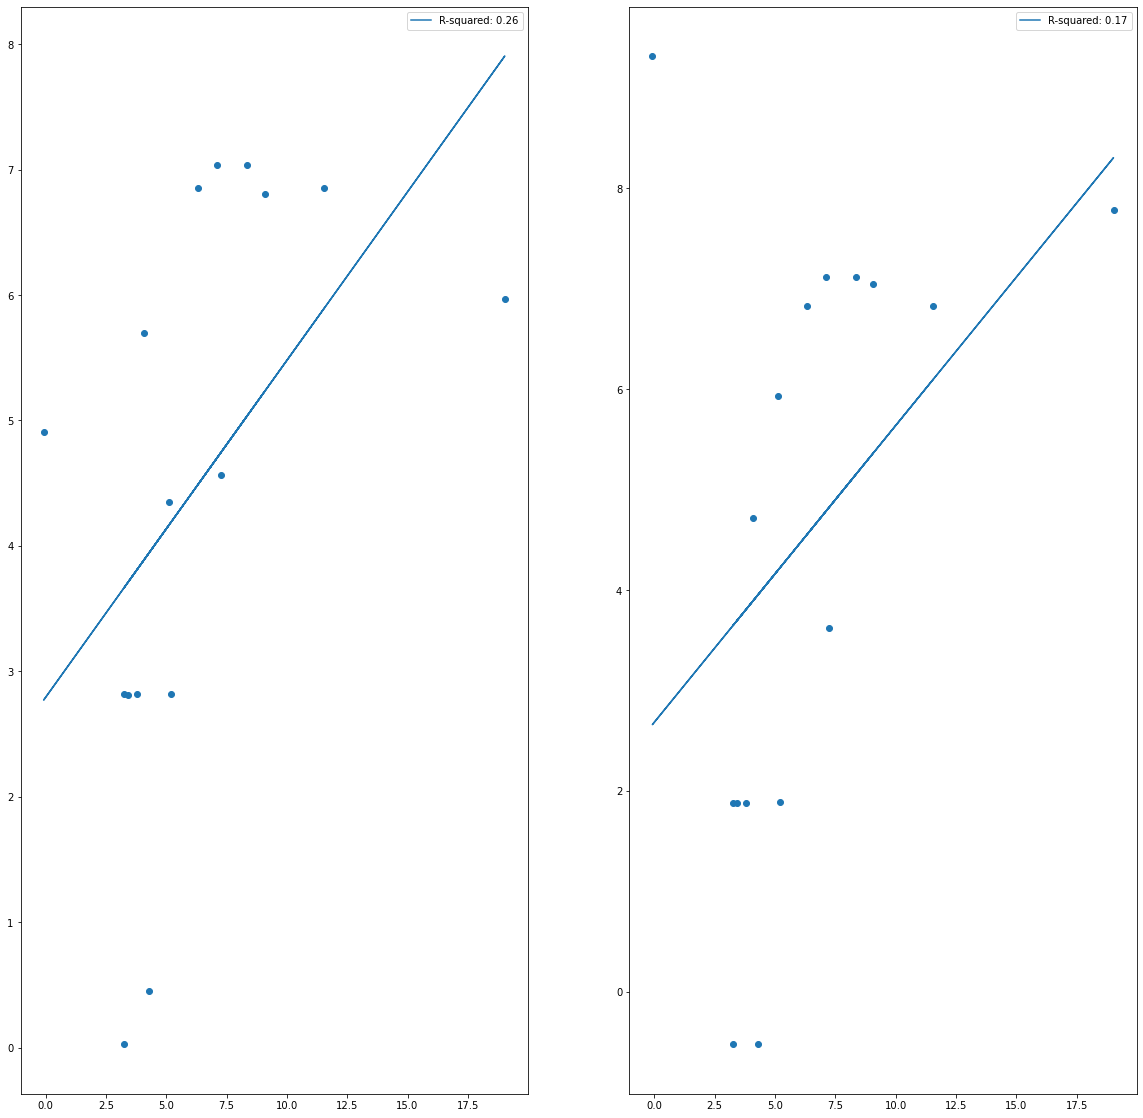

In [301]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2)

ax1.scatter(y_test, y_reg)
ax2.scatter(y_test, y_model)
ax1.plot(y_test, reg_1.intercept + reg_1.slope*y_test, label = f"R-squared: {reg_1.rvalue**2:.2f}")
ax2.plot(y_test, reg_2.intercept + reg_2.slope*y_test, label = f"R-squared: {reg_2.rvalue**2:.2f}")
ax1.legend()
ax2.legend()

Epoch 1/20
4/4 [==============================] - 0s 997us/step - loss: 460.5331 - mean_squared_error: 460.5331
Epoch 2/20
4/4 [==============================] - 0s 499us/step - loss: 104.7398 - mean_squared_error: 104.7398
Epoch 3/20
4/4 [==============================] - 0s 997us/step - loss: 49.4841 - mean_squared_error: 49.4841
Epoch 4/20
4/4 [==============================] - 0s 499us/step - loss: 29.5282 - mean_squared_error: 29.5282
Epoch 5/20
4/4 [==============================] - 0s 748us/step - loss: 16.1929 - mean_squared_error: 16.1929
Epoch 6/20
4/4 [==============================] - 0s 748us/step - loss: 49.5684 - mean_squared_error: 49.5684
Epoch 7/20
4/4 [==============================] - 0s 747us/step - loss: 22.2405 - mean_squared_error: 22.2405
Epoch 8/20
4/4 [==============================] - 0s 499us/step - loss: 22.9074 - mean_squared_error: 22.9074
Epoch 9/20
4/4 [==============================] - 0s 499us/step - loss: 19.8375 - mean_squared_error: 19.8375
Epoch 